In [1]:
from PIL import Image
import torch

from mle.configuration_mle import MLEConfig
from mle.modeling_mle import MLEForAnimeLineExtraction

In [2]:
config = MLEConfig()

In [3]:
config

MLEConfig {
  "batch_norm_eps": 0.001,
  "block_kernel_size": 3,
  "block_patch_size": 24,
  "block_stride_size": 4,
  "hidden_act": "leaky_relu",
  "in_channels": 1,
  "last_hidden_channels": 16,
  "model_type": "mle",
  "negative_slope": 0.2,
  "num_decoder_layers": [
    7,
    5,
    3,
    2,
    2
  ],
  "num_encoder_layers": [
    2,
    3,
    5,
    7,
    12
  ],
  "transformers_version": "4.37.2",
  "upsample_ratio": 2
}

In [4]:
model = MLEForAnimeLineExtraction(config)

In [5]:
model

MLEForAnimeLineExtraction(
  (model): MLEModel(
    (encoder): MLEEncoder(
      (layers): ModuleList(
        (0): MLEEncoderLayer(
          (blocks): ModuleList(
            (0): MLEResBlock(
              (norm1): MLEBatchNorm(
                (norm): BatchNorm2d(1, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
                (act_fn): LeakyReLU(negative_slope=0.2)
              )
              (conv1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (norm2): MLEBatchNorm(
                (norm): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
                (act_fn): LeakyReLU(negative_slope=0.2)
              )
              (conv2): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (resize): Conv2d(1, 24, kernel_size=(1, 1), stride=(1, 1))
            )
            (1): MLEResBlock(
              (norm1): MLEBatchNorm(
                (norm): BatchNorm2d(24, eps=0.001

In [6]:
inputs = torch.rand([1, 1, 128, 128])
inputs.shape

torch.Size([1, 1, 128, 128])

In [7]:
with torch.no_grad():
    out = model(inputs)

out

torch.Size([1, 384, 8, 8])
torch.Size([1, 192, 16, 16])
MLEUpsampleResBlock(
  (upsample): MLEUpsampleBlock(
    (norm): MLEBatchNorm(
      (norm): BatchNorm2d(384, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (act_fn): LeakyReLU(negative_slope=0.2)
    )
    (conv): Conv2d(384, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (upsample): Upsample(scale_factor=2.0, mode='nearest')
  )
  (norm): MLEBatchNorm(
    (norm): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (act_fn): LeakyReLU(negative_slope=0.2)
  )
  (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (resize): Sequential(
    (0): Conv2d(384, 192, kernel_size=(1, 1), stride=(1, 1))
    (1): Upsample(scale_factor=2.0, mode='nearest')
  )
)
torch.Size([1, 192, 16, 16])
torch.Size([1, 96, 32, 32])
MLEUpsampleResBlock(
  (upsample): MLEUpsampleBlock(
    (norm): MLEBatchNorm(
      (norm): BatchNorm2d(192, eps=0.001, momentum=0.

MLEForAnimeLineExtractionOutput(last_hidden_state=tensor([[[[ 0.3967,  0.4012,  0.0922,  ...,  0.4428, -0.0698,  0.1598],
          [ 0.3659,  0.1693,  0.4784,  ...,  0.2408, -0.0799, -0.1820],
          [ 0.0258,  0.6541, -0.2565,  ..., -0.4400, -0.1857,  0.4522],
          ...,
          [ 0.8058,  0.4123,  0.5770,  ...,  1.0844, -0.2295,  0.4514],
          [ 0.4500,  0.3509,  0.5706,  ...,  0.5229,  0.0817,  0.2821],
          [-0.1273, -0.2246, -0.2004,  ..., -0.2081,  0.0738, -0.1091]]]]), pixel_values=tensor([[0.3967, 0.4012, 0.0922,  ..., 0.4428, 0.0000, 0.1598],
        [0.3659, 0.1693, 0.4784,  ..., 0.2408, 0.0000, 0.0000],
        [0.0258, 0.6541, 0.0000,  ..., 0.0000, 0.0000, 0.4522],
        ...,
        [0.8058, 0.4123, 0.5770,  ..., 1.0844, 0.0000, 0.4514],
        [0.4500, 0.3509, 0.5706,  ..., 0.5229, 0.0817, 0.2821],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0738, 0.0000]]))

In [8]:
out.pixel_values.cpu().numpy().shape

(128, 128)

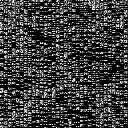

In [9]:
Image.fromarray(out.pixel_values.cpu().numpy(), mode="L").convert("RGB")